# Phishing Detection

Phishing is a type of fraud in which the attacker attempts to learn sensitive information by sending emails or other communication channels as a legitimate entity or person, such as login credentials or account information.

---




A victim usually receives a message that a recognized contact or entity appears to have sent. The message contains malicious software that attacks the user's device, or links to direct victims to malicious websites to trick them into revealing personal and financial information , such as passwords, account IDs or credit card data.

According to the Data description these are the meaning of the values in the data

1. 1 means legitimate
2. 0 is suspicious
3. -1 is phishing

## Executive Summary:

* Our Main goal is here to see which factors are directly depended on our target variable 'result'

* Hyper Parameter Tuning






                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },

                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] 
                 },

                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [None, 10, 50, 90, 120],
                 "classifier__max_depth":[None, 3, 5, 7],
                 "classifier__min_samples_leaf":[None, 1,2,5],
                 "classifier__max_leaf_nodes": [None, 2, 5,10]}]

## Random Search CV results:

         steps=[('classifier',

                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=90, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.9490503466988243

### Result Summary

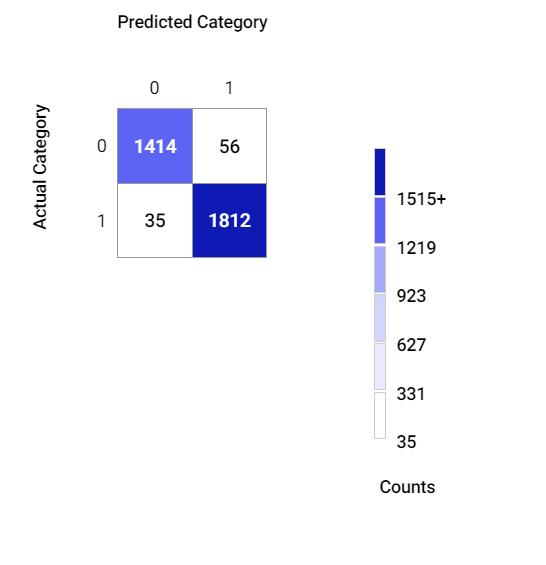

Accuracy score: 
0.9725655712993669

Classification report: 

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1470
           1       0.97      0.98      0.98      1847

    accuracy                           0.97      3317



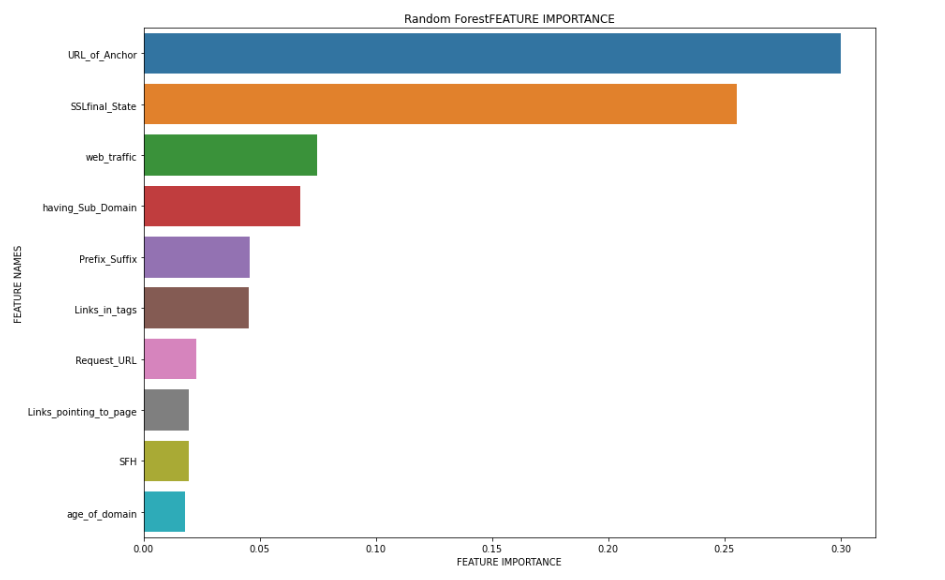

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install comet-ml

In [ ]:
#import comet_ml in the top of your file
from comet_ml import Experiment

In [ ]:
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="PxLU7PAOtwmy10Q8zqVKvWt1J", project_name="general", workspace="laay", log_code = True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/content/dataset.csv')

In [ ]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
def getMissingvalues(dataset,rownums=5):
    '''
    This function detects the missing value and percentage missing values per column. rownum suggests the number of rows to display. 
    '''
    dataset1 = pd.DataFrame(dataset.isnull().sum(), columns = ["Number of missing data points"])
    dataset1['Percentage Missing values (%)'] = round((dataset1['Number of missing data points']/len(dataset))*100, 2)
    dataset1 = dataset1.sort_values(by=['Percentage Missing values (%)'], kind = 'quicksort', ascending=False)
    if dataset1.iloc[0, 0] > 0:
        return dataset1.head(rownums)
    else:
        return print("No Missing values in this dataset")
    
getMissingvalues(data, 5)

No Missing values in this dataset


In [ ]:
def categorical_variables(dataset):
    '''list the non-numerical variables
    '''
    a = pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_']).dtypes, columns = ["Data Type"])
    a['Number of levels'] = pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_'])).nunique()
    return a
categorical_variables(data)

,Data Type,Number of levels


In [ ]:
def numerical_variables(dataset):
    ''' list the numerical variables
    '''
    a = pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8']).dtypes, columns = ["Data Type"])
    a['Number of levels'] = pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8'])).nunique()
    return a

print("dimensions:", numerical_variables(data).shape)
numerical_variables(data).head()

dimensions: (32, 2)


,Data Type,Number of levels
index,int64,11055
having_IPhaving_IP_Address,int64,2
URLURL_Length,int64,3
Shortining_Service,int64,2
having_At_Symbol,int64,2


We don't have any non-numerical variables. Let's drop the Index column which is not necessary for the analysis and do some Exploratory Data Analysis

In [ ]:
data = data.drop(columns=['index'])

In [ ]:
data.shape #to verify the dropping of column

(11055, 31)

# Exploratory Data Analysis

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
def hundred_bar(dataset, col1, col2, size1, size2): 
    dataset.groupby([col1, col2]).size().groupby(level=0).apply(
                                        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',
                                        stacked=True)
    plt.rcParams["figure.figsize"] = (size1, size2)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.set_palette("GnBu_r",2)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def hundred_bar(dataset, col1, col2, size1, size2): 
    import matplotlib.ticker as mtick
    import matplotlib.pyplot as plt
    import seaborn as sns
    dataset.groupby([col1, col2]).size().groupby(level=0).apply(
                                        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',
                                        stacked=True)
    plt.rcParams["figure.figsize"] = (size1, size2)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.set_palette("GnBu_r",2)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

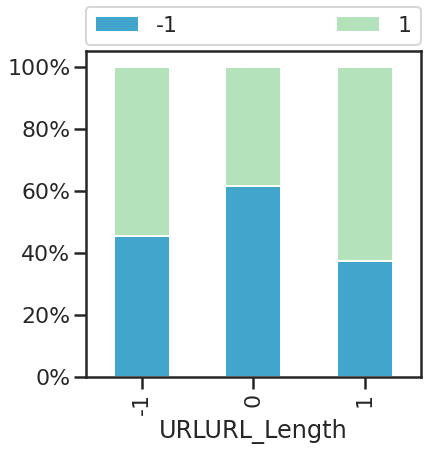

In [ ]:
hundred_bar(data, 'URLURL_Length', 'Result', 6, 6)

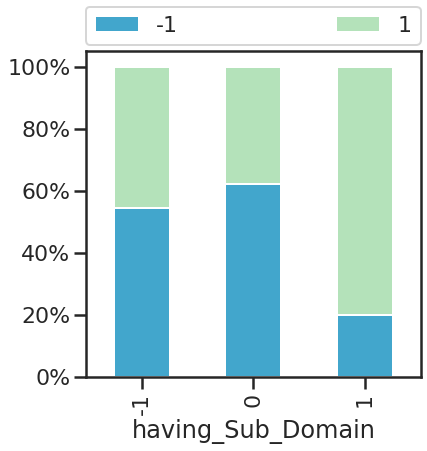

In [ ]:
hundred_bar(data, 'having_Sub_Domain', 'Result', 6, 6)

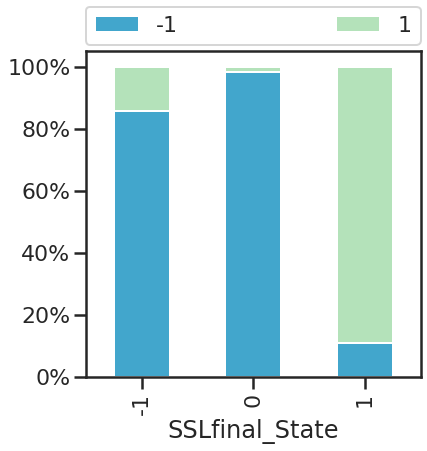

In [ ]:
hundred_bar(data, 'SSLfinal_State', 'Result', 6, 6)

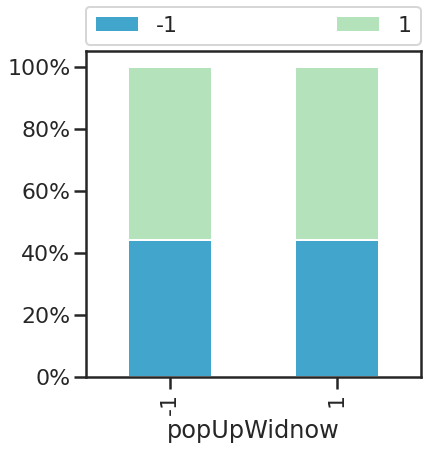

In [ ]:
hundred_bar(data, 'popUpWidnow', 'Result', 6, 6) 

In [ ]:
y = data['Result']
X = data.drop('Result',axis =1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0, stratify = y)

In [ ]:
X_train.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
9509,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,-1,1,0,-1,1,0,1
2688,1,1,1,1,1,1,0,1,-1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,-1,1,-1,1,1,1
452,-1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,1,1
9678,-1,-1,1,1,1,-1,-1,0,1,1,1,1,-1,0,0,1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1
7429,-1,-1,1,1,1,-1,1,0,1,1,1,1,-1,-1,1,0,1,1,0,1,1,1,1,-1,1,-1,-1,1,1,1


In [ ]:
param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [None, 10, 50, 90, 120],
                 "classifier__max_depth":[None, 3, 5, 7],
                 "classifier__min_samples_leaf":[None, 1,2,5],
                 "classifier__max_leaf_nodes": [None, 2, 5,10]}]

In [ ]:
pipe  = Pipeline(steps= [('classifier',RandomForestClassifier())])

In [ ]:
random_search = RandomizedSearchCV(pipe, param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = random_search.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=90, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.9490503466988243


In [ ]:
classes = ['Legit', 'phishing']

In [ ]:
features = []
for i in data.iloc[:,-1]:
  features.append(i)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text  # both are new in 0.21

from sklearn.tree import DecisionTreeClassifier

rf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train, y_train);

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)

rf.fit(X_train, y_train);

In [ ]:
y_probas = rf.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def binary_classification_accuracy(actual, pred):
    
    print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'\nAccuracy score: \n{accuracy_score(actual, pred)}')
    print(f'\nClassification report: \n{classification_report(actual, pred)}')

In [ ]:
binary_classification_accuracy(y_test, y_pred)

Confusion matrix: 
[[1414   56]
 [  35 1812]]

Accuracy score: 
0.9725655712993669

Classification report: 
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1470
           1       0.97      0.98      0.98      1847

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(14,10))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'].head(10), y=fi_df['feature_names'].head(10))
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

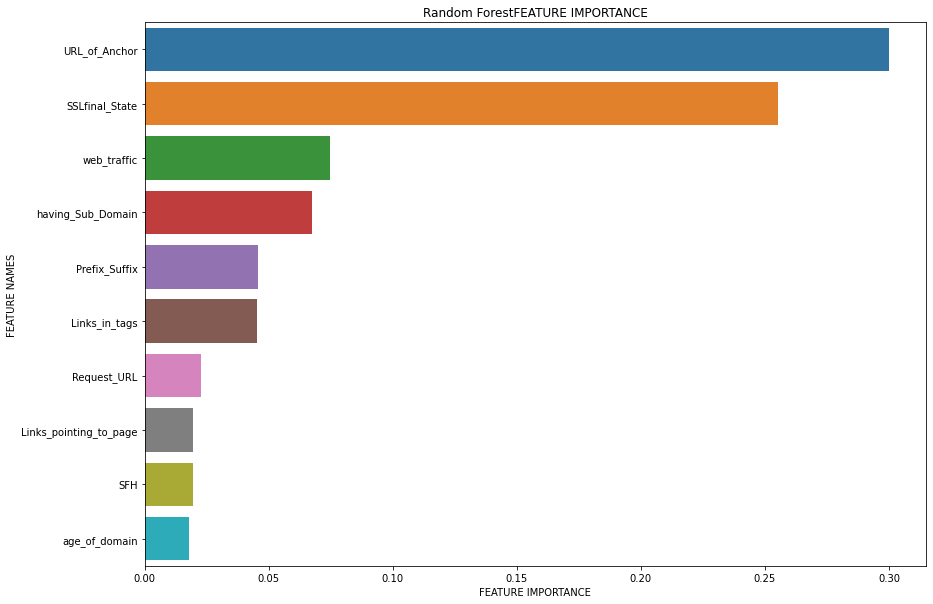

In [ ]:
plot_feature_importance(rf.feature_importances_, X_train.columns, 'Random Forest')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


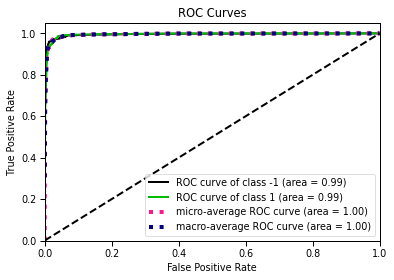

In [ ]:
# Import what's needed for the Functions API
import matplotlib.pyplot as plt
import scikitplot as skplt
sns.set_context("paper")

skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [ ]:
!pip install wandb -qq
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import wandb

     |████████████████████████████████| 1.6MB 3.5MB/s 
     |████████████████████████████████| 163kB 21.4MB/s 
     |████████████████████████████████| 122kB 14.9MB/s 
     |████████████████████████████████| 102kB 8.1MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 


In [ ]:
wandb.init('uncategorized')

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: laay (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb/run-20200921_161940-112n7ar3
wandb: Syncing run golden-pond-3


In [ ]:
def randomForestClassifier():
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=10)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)
    print(metrics.classification_report(y_test, preds))
    wandb.log({'accuracy_score': metrics.accuracy_score(y_test,preds)})
    wandb.sklearn.plot_confusion_matrix(y_test, preds, clf.classes_)
    # ROC Curve
    wandb.sklearn.plot_roc(y_test, pred_prob, clf.classes_)
    # Precision Recall Curve    
    wandb.sklearn.plot_precision_recall(y_test, pred_prob, clf.classes_)





In [ ]:
    wandb.log({'accuracy_score': metrics.accuracy_score(y_test,y_pred)})
    wandb.sklearn.plot_confusion_matrix(y_test, y_pred, rf.classes_)
    # ROC Curve
    wandb.sklearn.plot_roc(y_test, y_probas, rf.classes_)
    # Precision Recall Curve    
    wandb.sklearn.plot_precision_recall(y_test, y_probas, rf.classes_)

In [ ]:
def logisticRegressionClassifier():
  from sklearn.linear_model import LogisticRegression
  clf = LogisticRegression(solver='lbfgs', max_iter=4000)
  clf.fit(X_train, y_train)
  preds = clf.predict(X_test)
  pred_prob = clf.predict_proba(X_test)
  print(metrics.classification_report(y_test, preds))
  wandb.log({'accuracy_score': metrics.accuracy_score(y_test,preds)})
  wandb.sklearn.plot_confusion_matrix(y_test, preds, clf.classes_)
  # ROC Curve
  wandb.sklearn.plot_roc(y_test, pred_prob, clf.classes_)
  # Precision Recall Curve    
  wandb.sklearn.plot_precision_recall(y_test, pred_prob, clf.classes_)

In [ ]:
sweep_config = {
    'method': 'random', #grid, random
    'metric': {'name': 'accuracy_score','goal': 'maximize' },
    'parameters': {
        'model':{
            'values':['randomForest','logistic']
            }}}
sweep_id = wandb.sweep(sweep_config)

Create sweep with ID: zfyjkbpj
Sweep URL: https://wandb.ai/laay/uncategorized/sweeps/zfyjkbpj


In [ ]:
def train():
  wandb.init()
  if wandb.config.model == 'logistic':
    logisticRegressionClassifier()
  if wandb.config.model == 'randomForest':
    randomForestClassifier()

In [ ]:
# Confusion Matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=rf.classes_)


# Precision Recall
wandb.log({'pr': wandb.plots.precision_recall(y_test, y_probas, rf.classes_)})

In [ ]:
# ROC
wandb.log({'roc': wandb.plots.ROC(y_test, y_probas, rf.classes_)})

In [ ]:
wandb.sklearn.plot_class_proportions(y_train, y_test, ['legit', 'phishing'])

In [ ]:
!pip install comet_ml

     |████████████████████████████████| 225kB 2.8MB/s 
     |████████████████████████████████| 204kB 8.6MB/s 
     |████████████████████████████████| 501kB 11.8MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34547 sha256=9ce873653f7521c197eba2417911015273b3dbf2760bc9c47b5ad3ad9503b93a
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred = rf.predict(X_test)

print("\nResults\nConfusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("F1 score is {:6.3f}".format(f1))
print("Precision score is {:6.3f}".format(precision))
print("Recall score is {:6.3f}".format(recall))

#these will be logged to your sklearn-demos project on Comet.ml
params={"model_type":"RandomForest",
        "param_grid":str(param),
        "stratify":True
}

metrics = {"f1":f1,
"recall":recall,
"precision":precision
}

experiment.log_dataset_hash(X_train)
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix = cm)

COMET WARNING: truncated string; too long: '[{'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)], 'classifier__penalty': ['l2', 'l1'], 'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])}, {'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)], 'classifier__penalty': ['l2']


Results
Confusion matrix 
 [[1414   56]
 [  35 1812]]
F1 score is  0.976
Precision score is  0.970
Recall score is  0.981


{'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=581ce7d061b74515962b6ce0d4954726&experimentKey=8ccea4fb52be4c18b0129bd97b765e19',
 'assetId': '581ce7d061b74515962b6ce0d4954726',
 'web': 'https://www.comet.ml/api/asset/download?assetId=581ce7d061b74515962b6ce0d4954726&experimentKey=8ccea4fb52be4c18b0129bd97b765e19'}

In [ ]:
pd.DataFrame(best_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_estimators,param_classifier__min_samples_leaf,param_classifier__max_leaf_nodes,param_classifier__max_depth,param_classifier,param_classifier__solver,param_classifier__penalty,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050084,0.001853,0.006160,0.000258,10,2,None,3,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 10, 'classifier__...",0.905685,0.915375,0.906331,0.899160,0.903038,0.905918,0.005360,5
1,0.084720,0.003197,0.002817,0.000110,NaN,NaN,NaN,NaN,"LogisticRegression(C=1.0, class_weight=None, d...",liblinear,l2,1,"{'classifier__solver': 'liblinear', 'classifie...",0.922481,0.917959,0.923773,0.924370,0.922431,0.922202,0.002250,2
2,0.006077,0.000282,0.000000,0.000000,None,2,10,None,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': None, 'classifier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.472497,0.001987,0.038099,0.001511,120,2,2,3,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 120, 'classifier_...",0.900517,0.907623,0.868863,0.892696,0.879767,0.889893,0.013999,7
4,0.009512,0.006125,0.000000,0.000000,None,1,2,5,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': None, 'classifier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,0.486565,0.024755,0.040809,0.009582,120,5,2,7,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 120, 'classifier_...",0.902455,0.895349,0.888889,0.881707,0.892696,0.892219,0.006876,6
6,0.492838,0.009865,0.035945,0.000493,90,1,None,7,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 90, 'classifier__...",0.939922,0.944444,0.936693,0.928895,0.926955,0.935382,0.006596,1
7,0.386663,0.005047,0.033889,0.004852,90,1,None,3,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 90, 'classifier__...",0.925711,0.925065,0.912145,0.917906,0.914674,0.919100,0.005453,4
8,0.376375,0.019215,0.029139,0.000855,90,1,2,None,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 90, 'classifier__...",0.883721,0.908915,0.865633,0.883646,0.895281,0.887439,0.014328,8
9,0.519505,0.047542,0.037489,0.006605,120,2,10,3,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,"{'classifier__n_estimators': 120, 'classifier_...",0.925711,0.930879,0.923773,0.906917,0.915966,0.920649,0.008373,3
